## Logistric Regression Using Weather Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("weather.csv")

In [3]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [4]:
df.size

8052

In [5]:
df.shape

(366, 22)

In [6]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

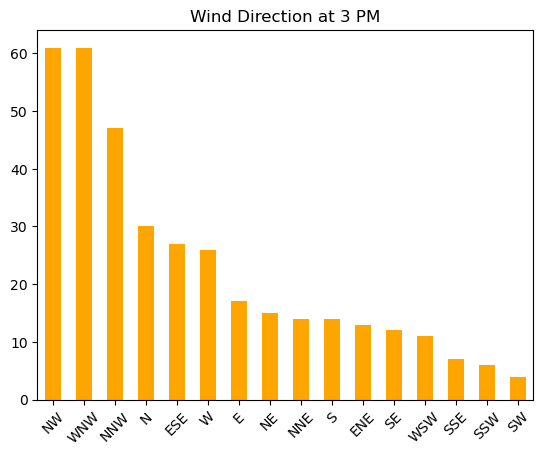

In [7]:
df['WindDir3pm'].value_counts().plot(kind="bar", color='orange')
plt.title("Wind Direction at 3 PM")
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.show()

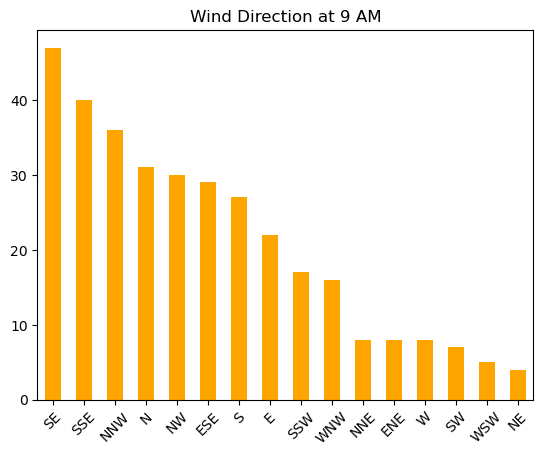

In [8]:
df['WindDir9am'].value_counts().plot(kind="bar", color='orange')
plt.title("Wind Direction at 9 AM")
plt.xticks(rotation=45)  # Rotate x-axis
plt.show()

**Transform categorical data into numerical values in a DataFrame**

In [9]:
df['RainToday']=df['RainToday'].apply(lambda x:1 if x == "Yes" else 0)

In [10]:
df['RainTomorrow']=df['RainTomorrow'].apply(lambda x:1 if x == "Yes" else 0)

In [11]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,0,3.6,1
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,1,3.6,1
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,1,39.8,1
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,1,2.8,1
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,1,0.0,0


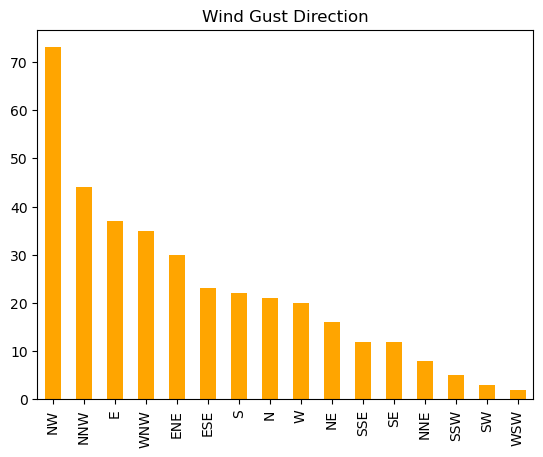

In [12]:
df.WindGustDir.value_counts().plot(kind = "bar",color = 'orange')
plt.title("Wind Gust Direction")
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df=df.dropna()

In [14]:
df.shape

(328, 22)

In [15]:
df.WindGustDir = le.fit_transform(df.WindGustDir)
df.WindDir3pm = le.fit_transform(df.WindDir3pm)
df.WindDir9am = le.fit_transform(df.WindDir9am)

In [16]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,...,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,7.742988,20.897561,1.440854,4.702439,8.014939,6.192073,40.396341,7.067073,7.512195,10.414634,...,44.003049,1019.350000,1016.530793,3.905488,4.000000,12.815549,19.556402,0.185976,1.422561,0.182927
std,5.945199,6.707310,4.289427,2.681183,3.506646,4.337765,13.132176,3.897197,4.560819,7.811544,...,16.605975,6.715244,6.469774,2.974957,2.652101,5.542521,6.644311,0.389681,4.234023,0.387197
min,-5.300000,7.600000,0.000000,0.200000,0.000000,0.000000,13.000000,0.000000,0.000000,2.000000,...,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000,0.000000,0.000000
25%,2.850000,15.500000,0.000000,2.550000,6.000000,2.000000,31.000000,3.000000,4.000000,6.000000,...,32.000000,1014.800000,1012.400000,1.000000,1.000000,8.175000,14.500000,0.000000,0.000000,0.000000
50%,7.900000,20.400000,0.000000,4.400000,8.750000,6.500000,39.000000,7.500000,7.000000,7.000000,...,42.500000,1019.750000,1016.900000,4.000000,4.000000,13.500000,18.850000,0.000000,0.000000,0.000000
75%,12.800000,25.800000,0.200000,6.600000,10.700000,8.000000,46.000000,10.000000,13.000000,13.000000,...,54.000000,1024.300000,1021.125000,7.000000,7.000000,17.200000,24.225000,0.000000,0.200000,0.000000
max,20.900000,35.800000,39.800000,13.800000,13.600000,15.000000,98.000000,15.000000,15.000000,41.000000,...,93.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,1.000000,39.800000,1.000000


In [17]:
#Training and Testing
from sklearn.model_selection import train_test_split
x = df.drop(['RainTomorrow'],axis=1)
y = df['RainTomorrow']

In [18]:
y


0      1
1      1
2      1
3      1
4      0
      ..
361    0
362    0
363    0
364    0
365    0
Name: RainTomorrow, Length: 328, dtype: int64

In [19]:
train_x , train_y ,test_x , test_y = train_test_split(x,y ,test_size = 0.3,random_state = 2)

In [20]:
train_x.shape

(229, 21)

In [21]:
test_x.shape

(229,)

In [22]:
train_y.shape

(99, 21)

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)
model.fit(train_x , test_x)

LogisticRegression(max_iter=2000)

In [24]:
predict = model.predict(train_y)

In [25]:
from sklearn.metrics import accuracy_score, classification_report
score = accuracy_score(predict, test_y)
score

0.9797979797979798

In [26]:
report = classification_report(predict, test_y)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        85
           1       0.88      1.00      0.93        14

    accuracy                           0.98        99
   macro avg       0.94      0.99      0.96        99
weighted avg       0.98      0.98      0.98        99



## Logistric Regression using Social Network Ads

In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [28]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [29]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [30]:
df.shape

(400, 5)

In [31]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [32]:
df = df.drop(columns=['Gender'])

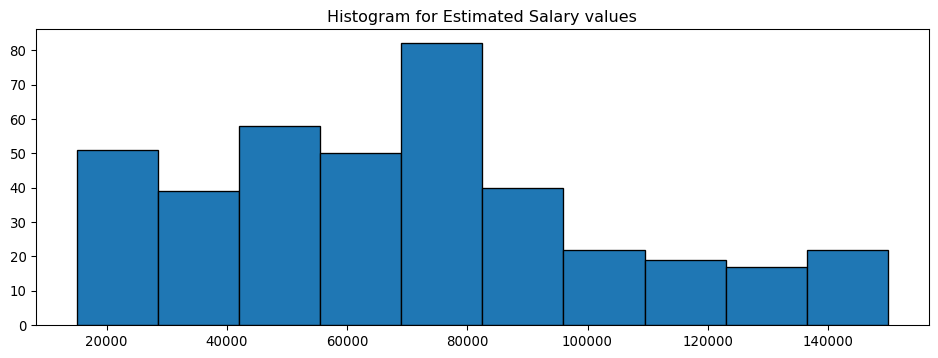

In [33]:
plt.figure(figsize = (12,4), dpi = 96)
plt.title("Histogram for Estimated Salary values")
plt.hist(df['EstimatedSalary'], bins = 'sturges', edgecolor = 'black')
plt. show()

In [34]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = 'Purchased')
y = df['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [35]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [36]:
print(lr.score(X_train, y_train))
y_train_pred = lr.predict(X_train)

0.8357142857142857


In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print("\n Confusion Matrix \n")
print(confusion_matrix(y_train, y_train_pred))

print("\n Classification Report\n")
print(classification_report(y_train, y_train_pred))


 Confusion Matrix 

[[170  14]
 [ 32  64]]

 Classification Report

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       184
           1       0.82      0.67      0.74        96

    accuracy                           0.84       280
   macro avg       0.83      0.80      0.81       280
weighted avg       0.83      0.84      0.83       280

